# IMB Allgatherv performance comparison

In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,12)
import seaborn as sns
sns.set_style("white", {"font.family": "serif"})

In [2]:
import sys
sys.path.append('../../../python-modules')

In [3]:
from utilities import filemanip

In [4]:
from synthanalysis import imb

In [5]:
benchmark = "Allgatherv"
systems = ['ARCHER_CrayMPICH774',
           'ARCHER2_CrayMPICH8015',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
imb_perf = {}
for system in systems:
    tdict = {}
    for nodes in nodelist:
        stem = 'IMB_{0}_{1}nodes'.format(benchmark, nodes)
        imbfiles = filemanip.get_filelist('../results/' + system, stem)
        if len(imbfiles) > 0:
            imb_dict = imb.get_perf_dict(imbfiles[0], nodes)
            tdict.update(imb_dict)
    imb_perf[system] = tdict

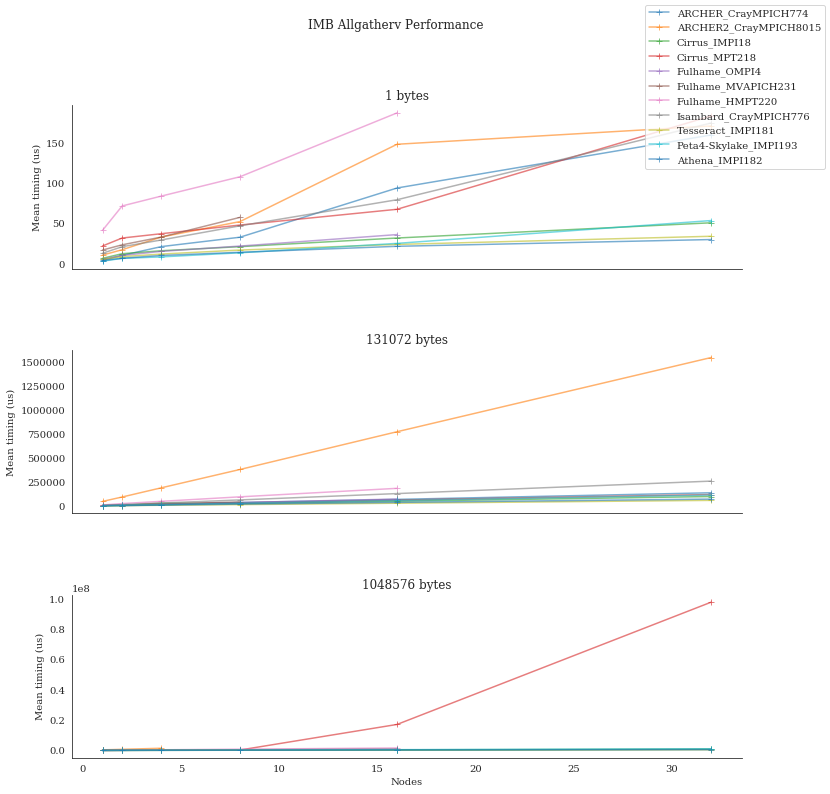

In [6]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} bytes".format(size), ylabel="Mean timing (us)")
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

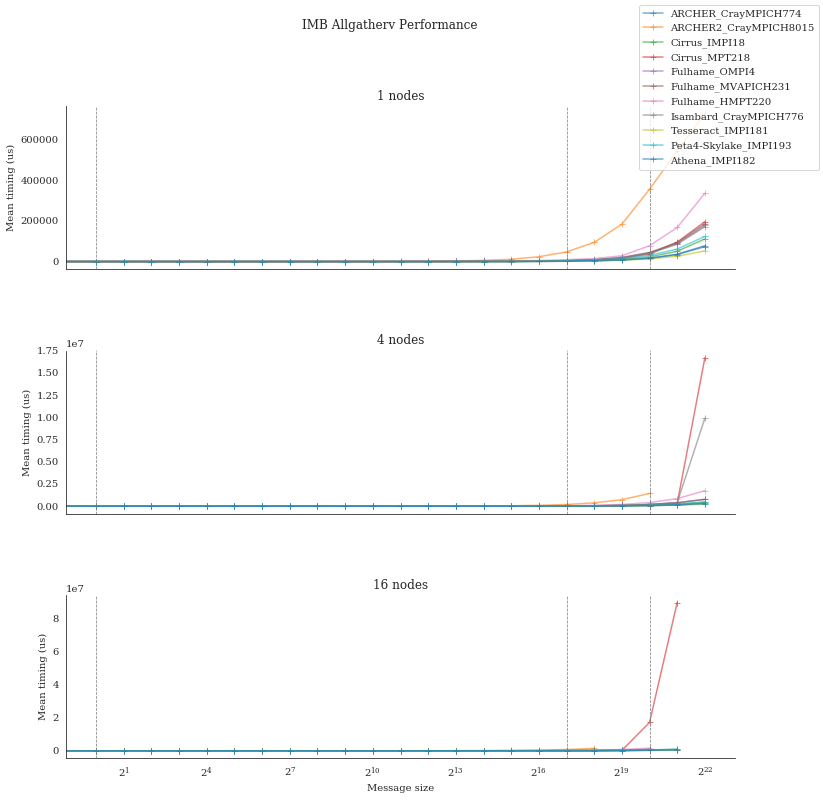

In [7]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} Performance'.format(benchmark))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_perf[system]), '-+', label=system, alpha=0.6)
    ax.set(title="{0} nodes".format(nodes), ylabel="Mean timing (us)")
    ax.axvline(x=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='upper right')

In [8]:
baseline = 'ARCHER_CrayMPICH774'
systems = ['ARCHER2_CrayMPICH8015',
           'Cirrus_IMPI18',
           'Cirrus_MPT218',
           'Fulhame_OMPI4',
           'Fulhame_MVAPICH231',
           'Fulhame_HMPT220',
           'Isambard_CrayMPICH776',
           'Tesseract_IMPI181',
           'Peta4-Skylake_IMPI193',
           'Athena_IMPI182']
nodelist = [1, 2, 4, 8, 16, 32]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
print("IMB {0} performance relative to {1}".format(benchmark, baseline))
imb_ratio = imb.analyse_perf_matrix(baseline, systems, nodelist, sizelist, imb_perf, invert=True)           

IMB Allgatherv performance relative to ARCHER_CrayMPICH774
            #nodes
      #bytes         1         2         4         8        16        32
ARCHER2_CrayMPICH8015
           0      0.43      0.42      0.34      0.27      0.24      0.22
           1      0.40      0.59      0.64      0.63      0.63      0.93
           2      0.38      0.44      0.64      0.60      0.59      0.75
           4      0.26      0.43      0.65      0.68      0.54      0.52
           8      0.25      0.37      0.45      0.40      0.37      0.44
          16      0.21      0.27      0.25      0.38      0.36      0.46
          32      0.14      0.14      0.24      0.25      0.38      0.40
          64      0.07      0.10      0.17      0.31      0.36      0.39
         128      0.05      0.07      0.24      0.33      0.35      0.33
         256      0.03      0.11      0.23      0.28      0.40      0.26
         512      0.05      0.09      0.17      0.28      0.27      0.19
        1024      0.05  

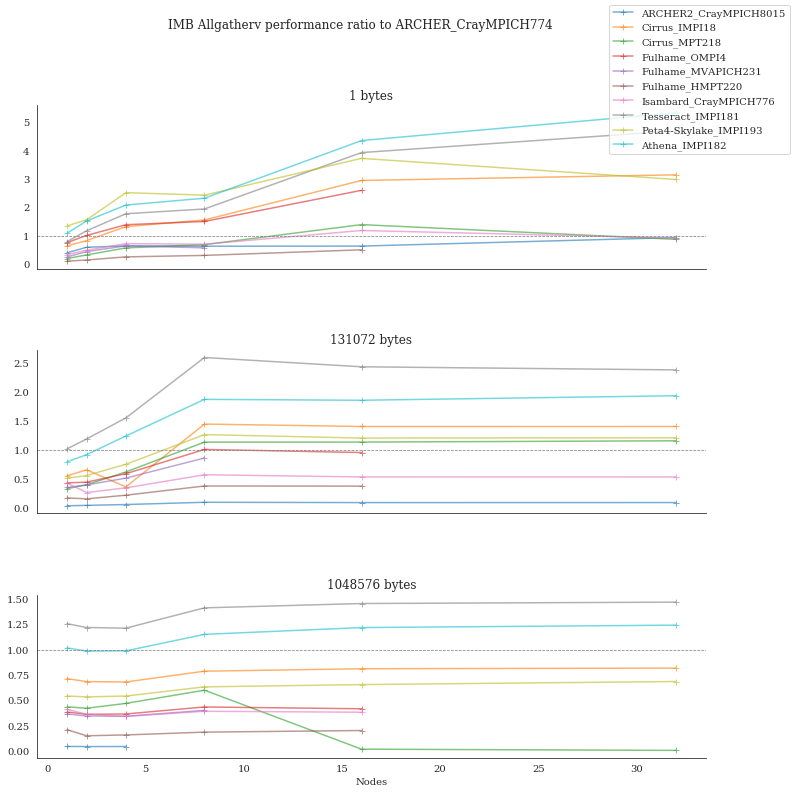

In [9]:
sizelist = [1, 131072, 1048576]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, size in zip(axes.flatten(), sizelist):
    for system in systems:
        ax.plot(nodelist, imb.get_node_scaling(nodelist, size, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.set(title="{0} bytes".format(size))
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xlabel("Nodes")
fig.legend(handles, labels, loc='upper right')

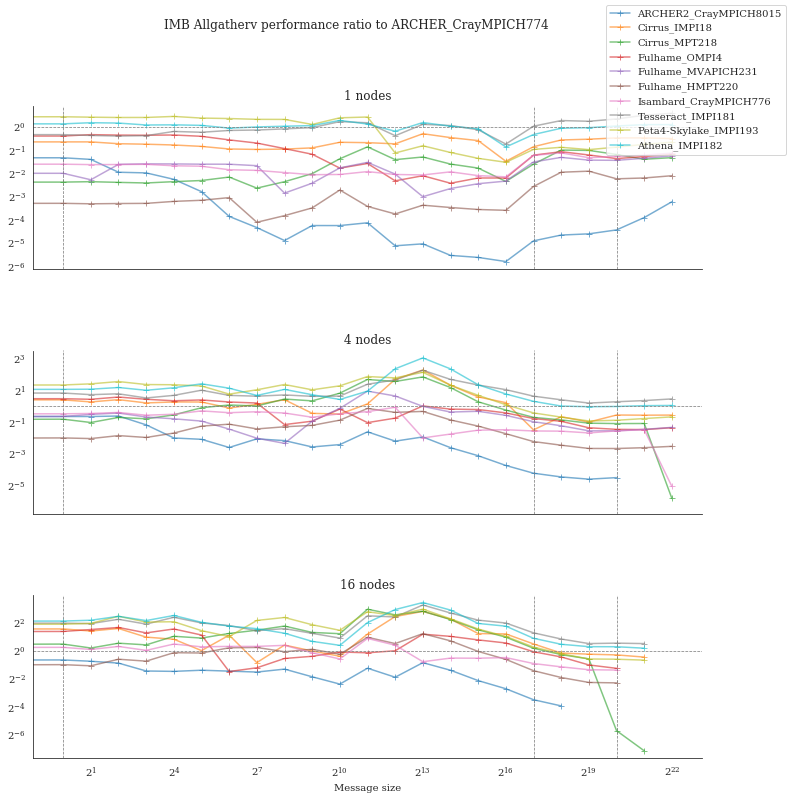

In [10]:
nodelist = [1, 4, 16]
sizelist = [0,
            1,
            2,
            4,
            8,
           16,
           32,
           64,
          128,
          256,
          512,
         1024,
         2048,
         4096,
         8192,
        16384,
        32768,
        65536,
       131072,
       262144,
       524288,
      1048576,
      2097152,
      4194304]
fig, axes = plt.subplots(nrows=3, ncols=1, sharex='all')
fig.suptitle('IMB {0} performance ratio to {1}'.format(benchmark, baseline))
fig.subplots_adjust(hspace=0.5)
for ax, nodes in zip(axes.flatten(), nodelist):
    for system in systems:
        ax.plot(sizelist, imb.get_size_scaling(sizelist, nodes, imb_ratio[system]), '-+', label=system, alpha=0.6)
    ax.axhline(y=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1, c='gray', ls='--', lw=0.75)
    ax.axvline(x=131072, c='gray', ls='--', lw=0.75)
    ax.axvline(x=1048576, c='gray', ls='--', lw=0.75)
    ax.set_yscale('log', basey=2)
    ax.set(title="{0} nodes".format(nodes))
    handles, labels = ax.get_legend_handles_labels()
    sns.despine()
plt.xscale('log', basex=2)
plt.xlabel("Message size")
fig.legend(handles, labels, loc='upper right')